# Linear Regressions

##### More here: https://en.wikipedia.org/wiki/Linear_regression

Linear regressions = model relationship between scalar response and explanatory variables. In machine learning, that would be using your predictors to model the target. Linear models are often used due to its intuitiveness and simplicity in being implemented. They can be used for predictions, as well as explaining the variation in data.

The formula is y = Bo + XB + e, where: 
- y: target
- Bo: intercept
- X: predictors
- B: coefficients
- e: error term

Common accuracy metric = RMSE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns

Let's make some fake data and plot these first.

In [45]:
x = np.random.uniform(0, 40, size=(100))
y = x*2.5 + 3 + np.random.normal(1, 9, len(x))

print(x[:5])
print(y[:5])

[18.24666231 35.36415188 19.87296846  8.7616882  23.41097623]
[55.29496734 97.63332297 41.28581647 21.54055551 54.78580602]


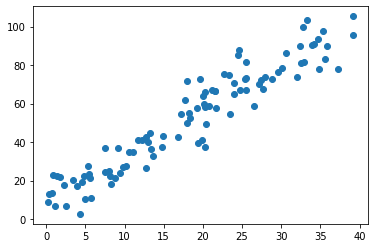

In [46]:
graph.scatter(x, y)
graph.show()

Nice! The data looks random enough

### Intercept and coeff calculation
Now I'll calculate the coefficient of X and the intercept. Later on we'll build these into our function.

To calculate the coeff, we need to calculate the covariance of x and y, and the variance of x. Then we can calculate the intercept

In [47]:
covar_xy = (x - np.mean(x)) * (y - np.mean(y))
var_x = (x - np.mean(x)) ** 2

coeff = np.sum(covar_xy) / var_x.sum()
intercept = np.mean(y) - (coeff * np.mean(x))

print(f'Coeff: {coeff:.2f}, intercept: {intercept:.2f}')                

Coeff: 2.36, intercept: 9.11


These are actually pretty close to coefficients and intercepts we used before. Let's plot model now

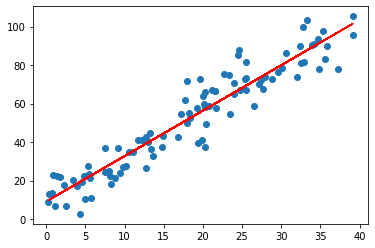

In [48]:
pred_y = intercept + x*coeff

graph.scatter(x, y)
graph.plot(x, pred_y, color='red')
graph.show()

Let's evaluate the model. Here we'll use the RMSE

In [49]:
rmse = np.sqrt(np.sum((pred_y - y) ** 2) / len(y))
print(f'Root mean squared error: {rmse:.2f}')

Root mean squared error: 8.30


This is a bit high. BUT if you look closely, that's similar to the random error we added to y in the beginning. Not bad for a very basic model. Now let's make the linear regression class. We'll create a function for the accuracy metric (RMSE) as well

## Linear Regression Class

In [83]:
class linear_regression():
    
    def __init__(self):
        self.coeff = None
        self.intercep = None
        
    def fit(self, x, y):        
        covar_xy = (x - np.mean(x)) * (y - np.mean(y))
        var_x = (x - np.mean(x)) ** 2

        self.coeff = np.sum(covar_xy) / np.sum(var_x)
        self.intercept = np.mean(y) - (self.coeff * np.mean(x))
        
    def get_params(self):
        return self.coeff, self.intercept
    
    def pred(self, X):
        if not self.coeff or not self.pred:
            raise Exception('Please call linear_regression.fit(x, y) before making predictions')
        
        self.pred_y = self.intercept + X*self.coeff
        return self.pred_y
    

def rmse(y, y_pred):
    return np.sqrt(np.sum((y_pred - y) ** 2) / len(y))

We'll create another set of fake data and test this class

In [103]:
A = np.random.uniform(100, 200, size=(50))
B = A*20 + 5 + np.random.normal(1, 100, len(A))

In [104]:
linear_model = linear_regression()
linear_model.fit(A, B)
print(linear_model.get_params())

(20.00347512641656, 11.77665459799664)


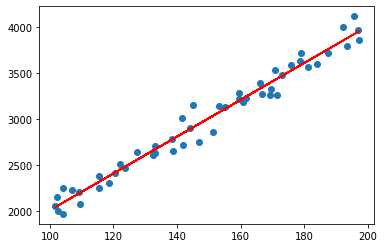

In [105]:
pred_y = linear_model.pred(A)
graph.scatter(A, B)
graph.plot(A, pred_y, color='red')
graph.show()

In [106]:
rmse(B, pred_y)

100.32108028359255